In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns
import matplotlib

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]
greens = ["#004225", "#529471", "#48b5c4", "#529471"]
semi_balck = '#4F6272'
plt.rcParams.update(matplotlib.rcParamsDefault)

In [3]:
def abs_percentage_error(A, F):
    abs_errors = [
        abs((a - f) / a)
        for a, f in zip(A, F)
    ]
    return np.mean(abs_errors), np.var(abs_errors)


def abs_percentage_error_by_batch(A, F):
    abs_errors = [
        abs((a - f) / a)
        for a, f in zip(A, F)
    ]
    jumps = list(range(0, len(abs_errors), 512)) + [len(abs_errors)]
    means = [
        np.mean(abs_errors[jumps[i]:jumps[i + 1]])
        for i in range(len(jumps) - 1)
    ]
    print(means)

    return np.mean(means), np.var(abs_errors)

In [4]:
results_path = "/Volumes/noamaz/modularity/digits/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "digits"
num_layers = '3'
n_features = 3
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"digits_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/digits_multi_arch/{res_folder}"

In [5]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = "2023-11-26-13-45-59_all_results_from_teach_archs_results_with_motifs_1000_ep_no_duplicates_fixed.csv"
lgbm_folder_name = 'exp_2023_11_27_11_00_0_nice_features'


In [6]:
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results_1kep_with_preds"

In [16]:
num_features = []
feature_selection_res = pd.DataFrame()
for file_name in os.listdir(lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    feature_selection_res = pd.concat([feature_selection_res, temp], ignore_index=True)
feature_selection_res = feature_selection_res.sort_values('num_features')

In [17]:
feature_selection_ind_res = pd.DataFrame()
all_preds = {}
for file_name in os.listdir(lgb_res_nn_path):
    if '._' in file_name:
        continue
    if 'prediction_results.csv' not in file_name:
        continue
    model = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    mape, var = abs_percentage_error(model['test_label'], model['test_pred'])
    num_features = int(file_name.split('only_')[1].split('_features')[0])
    all_preds[num_features] = {'model': model, 'mape': mape, 'var': var}
    temp = pd.DataFrame.from_dict({
        'test mape ind': [mape],
        'test mape ind var': [var],
        'num_features': [num_features],
    },
    )
    feature_selection_ind_res = pd.concat([feature_selection_ind_res, temp], ignore_index=True)
feature_selection_res = pd.merge(feature_selection_res, feature_selection_ind_res, left_on='num_features',
                                 right_on='num_features')

In [18]:
feature_selection_res.to_csv(f'{lgb_res_path}/{time_str}_all_exp_mape_prediction_results.csv')

In [27]:
feature_selection_res['mape_ratio_min'] = feature_selection_res['test mape ind'].min() / feature_selection_res[
    'test mape ind']
feature_selection_res['mape_ratio_min_inv'] = feature_selection_res[
                                                  'test mape ind'] / feature_selection_res['test mape ind'].min()
feature_selection_res['r2_ratio_max'] = feature_selection_res['best r2 test'] / feature_selection_res[
    'best r2 test'].max()

feature_selection_res['mape_reletive_cahnge'] = (feature_selection_res[
                                                     'test mape ind'] - feature_selection_res['test mape ind'].min()) / \
                                                feature_selection_res['test mape ind'].min()
feature_selection_res['r2_reletive_cahnge'] = (feature_selection_res['best r2 test'].max() - feature_selection_res[
    'best r2 test']) / feature_selection_res['best r2 test'].max()
feature_selection_res[
    ['mape_reletive_cahnge', 'r2_reletive_cahnge', 'mape_ratio_min', 'mape_ratio_min_inv', 'test mape ind',
     'best r2 test',
     'r2_ratio_max', 'num_features']]

,mape_reletive_cahnge,r2_reletive_cahnge,mape_ratio_min,mape_ratio_min_inv,test mape ind,best r2 test,r2_ratio_max,num_features
0,6.153519,0.358931,0.139791,7.153519,0.137922,0.636511,0.641069,1
1,0.710074,0.016845,0.584770,1.710074,0.032971,0.976165,0.983155,2
2,0.262026,0.003322,0.792377,1.262026,0.024332,0.989592,0.996678,3
3,2.199978,0.011220,0.312502,3.199978,0.061697,0.981750,0.988780,4
4,1.215640,0.010202,0.451337,2.215640,0.042718,0.982761,0.989798,5
5,0.516276,0.012035,0.659510,1.516276,0.029234,0.980941,0.987965,6
6,0.318905,0.005751,0.758205,1.318905,0.025429,0.987180,0.994249,7
7,0.610333,0.004505,0.620990,1.610333,0.031048,0.988417,0.995495,8
8,0.416668,0.004327,0.705882,1.416668,0.027314,0.988593,0.995673,9
9,0.475108,0.004191,0.677916,1.475108,0.028441,0.988729,0.995809,10


In [29]:
feature_selection_res[feature_selection_res['num_features'].isin((3, 20, 50))][[
    'best mape train',
    'test mape ind',
    'mape_reletive_cahnge',
    'best r2 train',
    'best r2 test',
    'r2_reletive_cahnge',
    'num_features',
]].round(4)

,best mape train,test mape ind,mape_reletive_cahnge,best r2 train,best r2 test,r2_reletive_cahnge,num_features
2,0.0230,0.0243,0.2620,0.9895,0.9896,0.0033,3
10,0.0209,0.0214,0.1114,0.9914,0.9916,0.0013,20
11,0.0179,0.0193,0.0000,0.9938,0.9929,0.0000,50


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_38556/3719746607.py:53: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


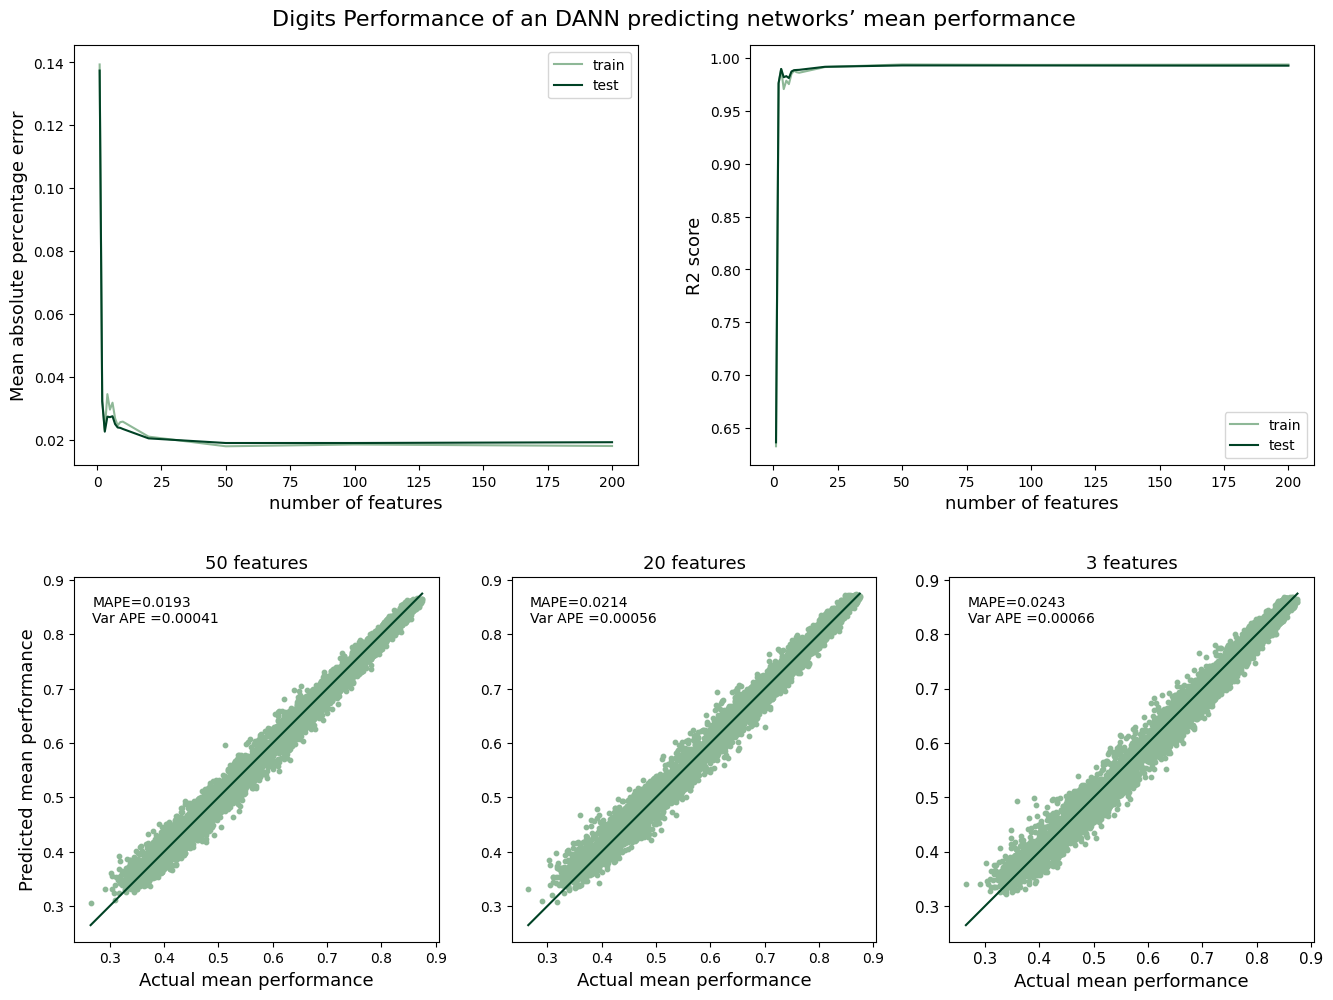

In [25]:

fetureas = [50, 20, 3]
start = 100
stop = 0
fig = plt.figure(figsize=(16, 12))
ax0 = fig.add_subplot(221)
ax01 = fig.add_subplot(222)

ax1 = fig.add_subplot(234)
ax2 = fig.add_subplot(235, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(236, sharex=ax1, sharey=ax1)

for ax, num_fet in zip((ax1, ax2, ax3), fetureas):
    model = all_preds[num_fet]['model']
    start_ = min(model['test_label'].min(), model['test_pred'].min())
    if start_ < start:
        start = start_
    stop_ = max(model['test_label'].max(), model['test_pred'].max())
    if stop_ > stop:
        stop = stop_
    ax.scatter(model['test_label'], model['test_pred'], s=10, c=COLORS[3])
    textstr = '\n'.join((
        r'MAPE=%.4f' % (all_preds[num_fet]['mape']),
        r'Var APE =%.5f' % (all_preds[num_fet]['var'])))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', )
    ax.set_box_aspect(1)
    ax.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=greens[0])
    ax.set_title(
        f"{num_fet} features",
        wrap=True, fontsize=13)
    ax.set_xlabel('Actual mean performance', fontsize=13)

ax1.set_ylabel('Predicted mean performance', fontsize=13)

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.suptitle(f"{task.capitalize()} - DANN predicted performance vs. actual performance" ,wrap=True, fontsize=14)

ax0.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='train', c=COLORS[3])
ax0.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='test', c=greens[0])
ax01.plot(feature_selection_res['num_features'], feature_selection_res['best r2 train'], label='train', c=COLORS[3])
ax01.plot(feature_selection_res['num_features'], feature_selection_res['best r2 test'], label='test', c=greens[0])
ax0.set_xlabel('number of features', fontsize=13)
ax0.set_ylabel(f'Mean absolute percentage error', fontsize=13)
ax01.set_xlabel('number of features', fontsize=13)
ax01.set_ylabel(f'R2 score', fontsize=13)
ax0.legend()
ax01.legend()
plt.suptitle(
    f"{task.capitalize()} Performance of an DANN predicting networks’ mean performance",
    wrap=True, fontsize=16 , y=0.91)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

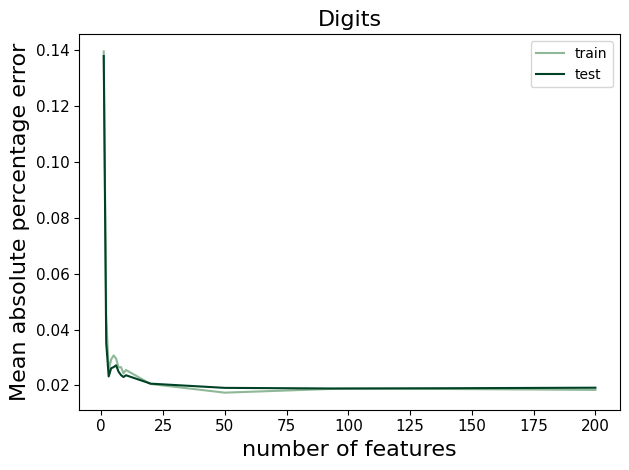

In [39]:
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='train', c=COLORS[3])
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='test', c=greens[0])

plt.xlabel('number of features', fontsize=16)
plt.ylabel(f'Mean absolute percentage error', fontsize=16)
plt.legend()
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

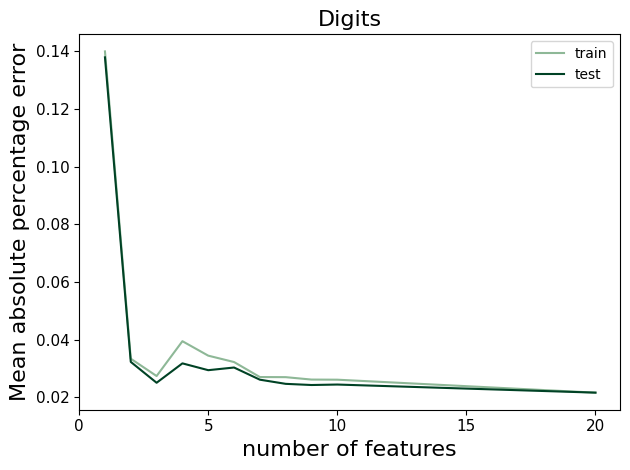

In [15]:
feature_selection_res_small = feature_selection_res[feature_selection_res['num_features'] <= 20]
plt.plot(feature_selection_res_small['num_features'], feature_selection_res_small['best mape train'], label='train',
         c=COLORS[3])
plt.plot(feature_selection_res_small['num_features'], feature_selection_res_small['best mape test'], label='test',
         c=greens[0])

plt.xlabel('number of features', fontsize=16)
plt.ylabel(f'Mean absolute percentage error', fontsize=16)
plt.legend()
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(np.arange(21)[::5], fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_zoom.png")
plt.show()

In [100]:
glob_inds = []
feature_selection_res_by_glob = pd.DataFrame()
for folder_name in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality"):
    glob_ind = folder_name.split('glob_')[1].replace('_', '.')
    glob_inds.append(glob_ind)
    lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality/{folder_name}/teach_archs_regression_feature_selection_results_1kep"
    f_ = []
    for file_name in sorted(os.listdir(lgb_res_nn_path)):

        if 'best.csv' not in file_name:
            continue
        temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
        num_features = int(file_name.split('only_')[1].split('_features')[0])
        if num_features in f_:
            continue
        f_.append(num_features)
        temp['num_features'] = num_features
        temp['glob_ind'] = glob_ind
        feature_selection_res_by_glob = pd.concat([feature_selection_res_by_glob, temp], ignore_index=True)
feature_selection_res_by_glob = feature_selection_res_by_glob.sort_values(['glob_ind', 'num_features'])

In [25]:
os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality")

['exp_2023-11-30-12-09-51_nice_features_glob_0_5',
 'exp_2023-11-30-12-09-51_nice_features_glob_0_75',
 'exp_2023-11-30-12-09-51_nice_features_glob_1',
 'exp_2023-11-30-12-09-51_nice_features_glob_0']

In [104]:
feature_selection_res_by_glob.loc[[14], 'num_features'] = 9
feature_selection_res_by_glob = feature_selection_res_by_glob.sort_values(['glob_ind', 'num_features'])


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_38556/1423636608.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][


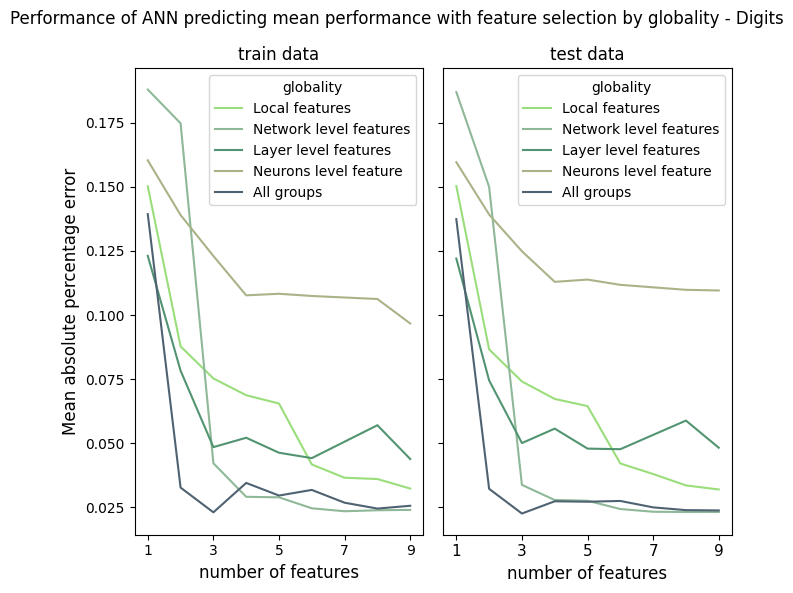

In [107]:
glob_levels =  {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Neurons level feature",
    0: "Local features"
}
sorted_greens = ['#9ADE7B', COLORS[3], "#529471", "#A9B388", "#004225"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] <= 9]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}",
             c=sorted_greens[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}",
             c=sorted_greens[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features'] <= 9]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'],
        label="All groups", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="All groups",
         c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
ax1.set_xticks(range(1,10, 2))
ax2.set_xticks(range(1,10, 2))

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [106]:
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] == 9]
    try:
        print(glob_levels[float(ind)], round(res_per_glob['best mape test'].item(), 3))
    except:
        continue
print('all', round(feature_selection_res[feature_selection_res['num_features'] == 9]['best mape test'].item(), 3))

Local features 0.032
Network level features 0.023
Layer level features 0.048
Neurons level feature 0.11
all 0.024


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_38556/1958468354.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][


In [94]:
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] == 1]
    try:
        print(glob_levels[float(ind)], round(res_per_glob['best mape test'].item(), 3))
    except:
        continue
print('all', round(feature_selection_res[feature_selection_res['num_features'] == 1]['best mape test'].item(), 3))

Local features 0.15
Network level features 0.187
Layer level features 0.122
Neurons level feature 0.16
all 0.137


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_38556/1173731828.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][


In [102]:
feature_selection_res_by_glob[feature_selection_res_by_glob['num_features'] == 9]


,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,num_features,glob_ind
32,0,122,0.032272,0.031916,0.000025,0.000025,0.977548,0.977608,9,0
8,0,87,0.096702,0.109574,0.000076,0.000085,0.791658,0.735010,9,0.5
14,0,843,0.043805,0.048210,0.000045,0.000048,0.926399,0.915066,9,0.75
23,0,809,0.023949,0.023141,0.000018,0.000018,0.988226,0.988721,9,1


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_86820/2978849237.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][


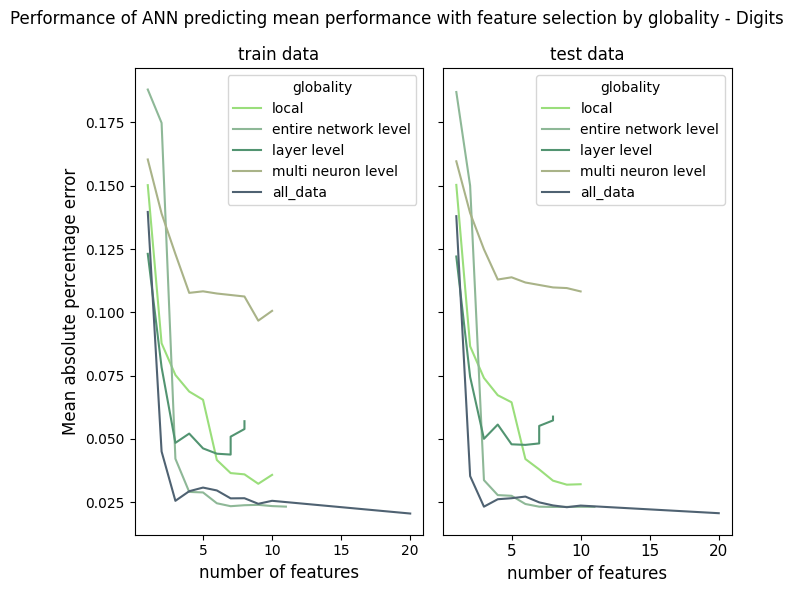

In [29]:
glob_levels = {
    1: "entire network level",
    0.75: "layer level",
    0.5: "multi neuron level",
    0: "local"
}
sorted_greens = ['#9ADE7B', COLORS[3], "#529471", "#A9B388", "#004225"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] <= 40]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}",
             c=sorted_greens[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}",
             c=sorted_greens[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features'] <= 20]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'],
         label="all_data", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="all_data",
         c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
#ax1.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0]+1)[::2])
#ax2.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0]+1)[::2])

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_long.png")
plt.show()

In [41]:
model_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/{n_features}_prediction_results.csv"
model_prediction_res = pd.read_csv(model_res_path)


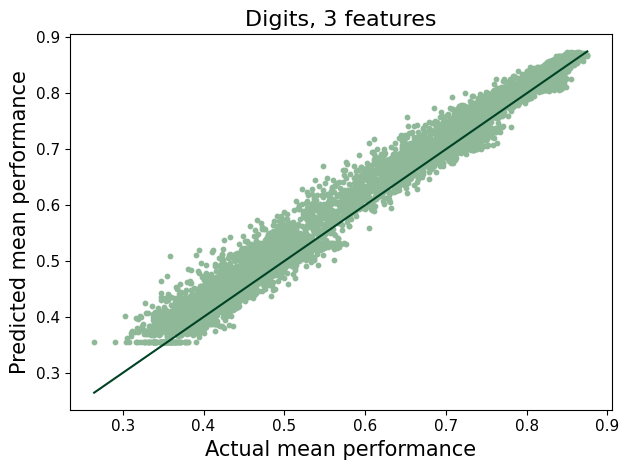

In [42]:
plt.scatter(model_prediction_res['test_label'], model_prediction_res['test_pred'], s=10, c=COLORS[3])
start = min(model_prediction_res['test_label'].min(), model_prediction_res['test_pred'].min())
stop = max(model_prediction_res['test_label'].max(), model_prediction_res['test_pred'].max())
plt.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=greens[0])
plt.ylabel('Predicted mean performance', fontsize=15)
plt.xlabel('Actual mean performance', fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}, {n_features} features",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual.png")
plt.show()

In [13]:
selected_features_res = pd.read_csv(f"{lgb_res_path}/{n_features}_feature_values.csv").drop("Unnamed: 0", axis=1)

In [14]:
selected_feature_names = list(selected_features_res.columns)[:-1]

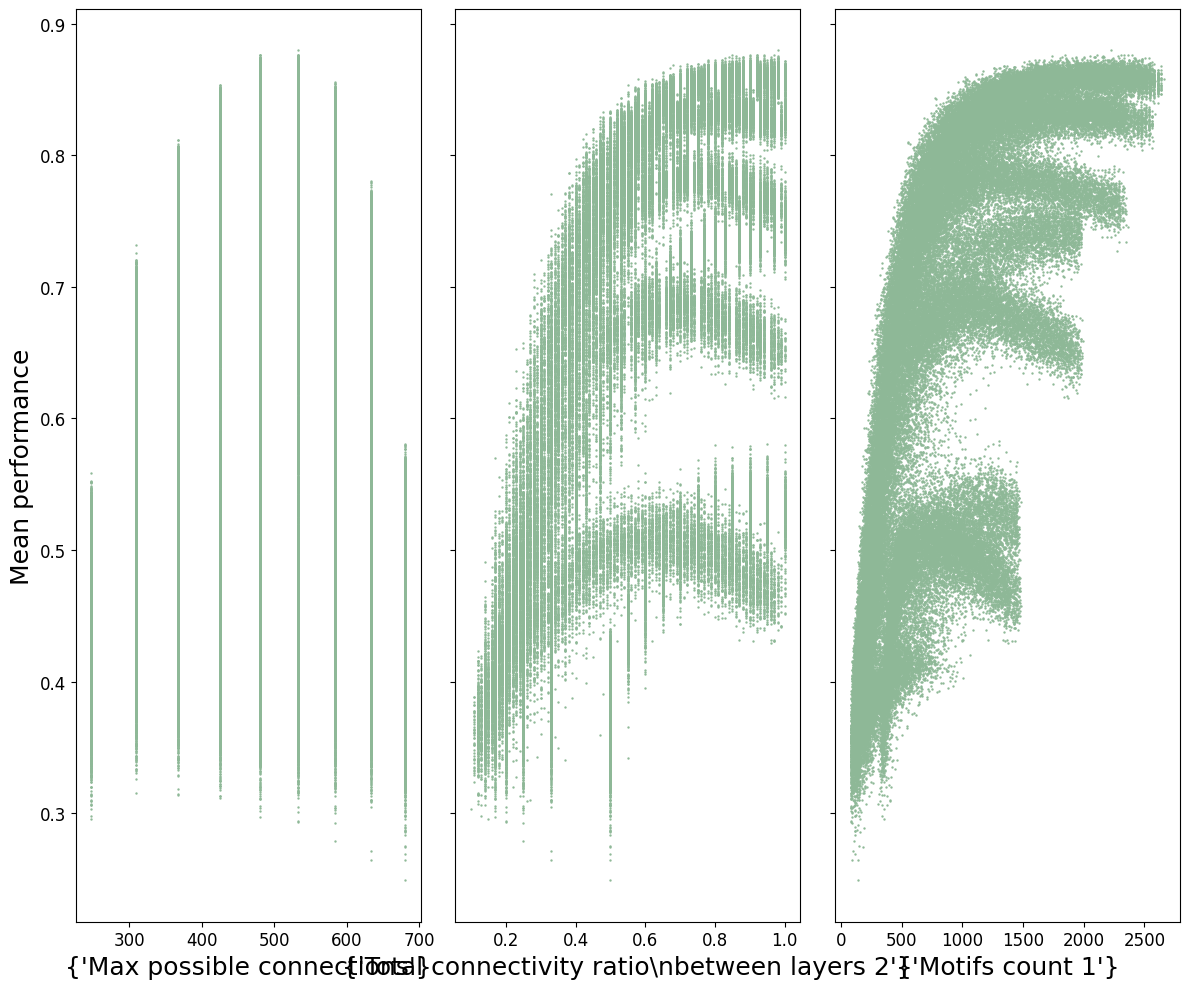

In [45]:
num_columns = int(np.ceil(len(selected_feature_names) // 3))
num_rows = int(np.ceil(len(selected_feature_names) // num_columns))
fig, axs = plt.subplots(num_columns, num_rows, figsize=(12, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
if num_columns > 1 and num_rows > 1:
    r, c, = axs.shape
    for i in range(r):
        for j in range(c):
            idxs.append((i, j))
else:
    for j in range(axs.shape[0]):
        idxs.append(j)
for k, (f_name, loc_) in enumerate(zip(selected_feature_names, idxs)):
    x_data = selected_features_res[f_name]
    # if  len(set(res[f_name])) < 15:
    #     x_data = x_data + np.random.normal(-0.1, 0.1, len(x_data))
    axs[loc_].scatter(x_data, selected_features_res['label'], c=COLORS[3], s=0.5)
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
    if len(f_name) > 40:
        name = f"{f_name.replace('_', ' ')[:22]}\n{f_name.replace('_', ' ')[22:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    axs[loc_].set_xlabel(f"{name.capitalize()}", fontsize=18)
    #axs[i, j].set_ylim(0,1)
    axs[loc_].tick_params(axis='x', labelsize=12)
    axs[loc_].tick_params(axis='y', labelsize=12)
#axs[1].set_ylabel(f"Mean performance", fontsize=18)
axs[0].set_ylabel(f"Mean performance", fontsize=18)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_fetaures_dist.png")
